<a href="https://colab.research.google.com/github/iamBHK/DiabetesPrediction/blob/main/PIMA_With_Multiple_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diabetes Prediction using

Logistic Regression

Random Classifier 

Decission Tree

Support Vector Machine

Naive Bias

KNN

For the PIMA diabetes Logistic Regression has given max accurracy with 78%

In [5]:
import pandas as pd

In [6]:
import math

In [7]:
import seaborn as sns

In [8]:
import matplotlib.pyplot as plt

In [9]:
file = pd.read_csv('diabetes.csv')

In [10]:
file.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
file.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Checking for Null Values. If any null values we will be replacing with the Average value of that feature

In [12]:
print("Rows : ",file.shape[0])
print("Columns :", file.shape[1])
print("-------------------")
file.info()

print("Null are : ", file.isna().sum())

Rows :  768
Columns : 9
-------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
Null are :  Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
Diab

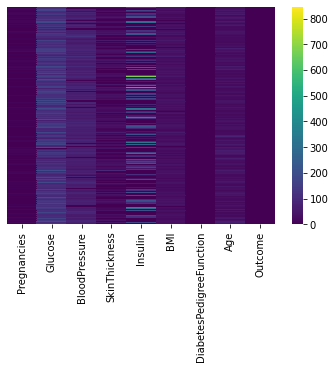

In [13]:
sns.heatmap(file, yticklabels=False, cmap='viridis')
plt.show()

In [14]:
Pregnancies = file.Pregnancies
Glucose = file.Glucose
BloodPressure = file.BloodPressure
SkinThickness = file.SkinThickness
Insulin = file.Insulin
BMI = file.BMI
DPF = file.DiabetesPedigreeFunction
Age = file.Age
Outcome = file.Outcome

In [15]:
X = file[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']]

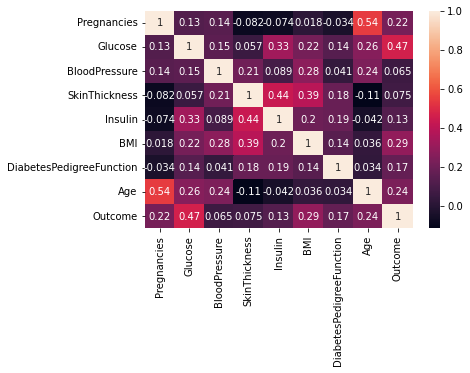

<Figure size 1440x1440 with 0 Axes>

In [16]:
# annot : shows values
# X.corr() ; corr() will build correlation b/w all features in X
H_Map = sns.heatmap(X.corr(), vmax=1, annot=True)
plt.figure(figsize=(20,20))
plt.show()

# Building predictions among the features will helps us to decide among all the available features

<BarContainer object of 18 artists>

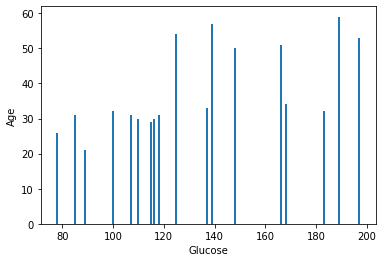

In [17]:
head = file.head(18)
plt.xlabel('Glucose')
plt.ylabel('Age')
plt.bar(head.Glucose, head.Age)

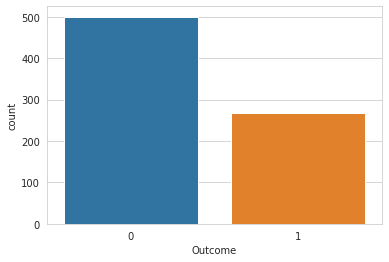

In [22]:
# sns.displot(x=file.Outcome, color='blue')


sns.countplot(data=file, x='Outcome')

In [23]:
sns.set_style('whitegrid')

cmap = sns.cubehelix_palette(dark=0, light=1, as_cmap=True)

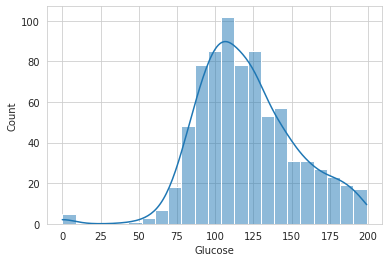

In [24]:
do = sns.histplot(x=Glucose, kde=True)

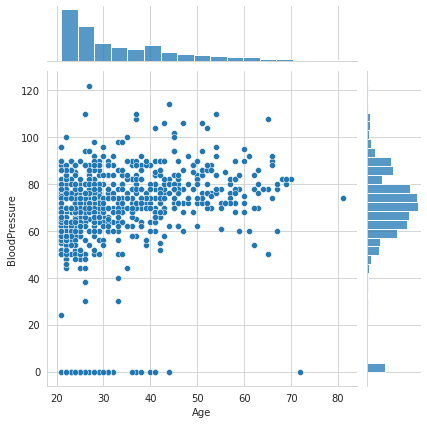

In [25]:
sns.jointplot(x=file.Age, y=file.BloodPressure)

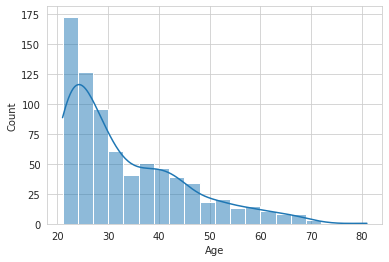

In [26]:
#bins : number of batches should be the o/p grouped into
sns.histplot(x=Age, bins=20, kde=True)

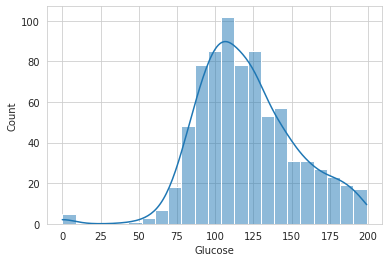

In [27]:
sns.histplot(x=file.Glucose, kde=True)

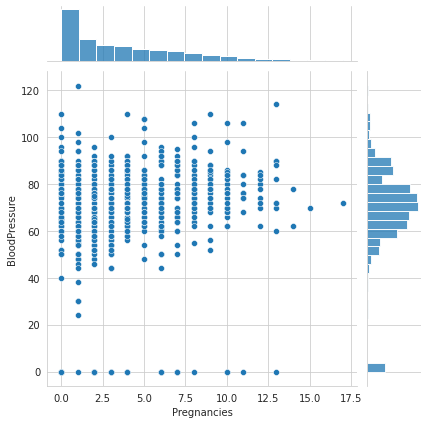

In [28]:
sns.jointplot(x=Pregnancies, y=BloodPressure)

<Figure size 1440x720 with 0 Axes>

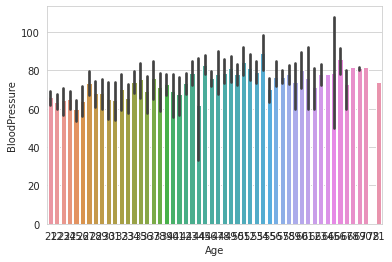

<Figure size 1440x720 with 0 Axes>

In [29]:
sns.barplot(x=file.Age, y=file.BloodPressure)
plt.figure(figsize=(20,10))

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train,X_test,Y_train,Y_test = train_test_split(file.drop('Outcome', axis=1), file['Outcome'], test_size=0.3, random_state=101)

In [32]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
711,5,126,78,27,22,29.6,0.439,40
58,0,146,82,0,0,40.5,1.781,44
216,5,109,62,41,129,35.8,0.514,25
168,4,110,66,0,0,31.9,0.471,29
658,11,127,106,0,0,39.0,0.190,51
...,...,...,...,...,...,...,...,...
75,1,0,48,20,0,24.7,0.140,22
599,1,109,38,18,120,23.1,0.407,26
575,1,119,44,47,63,35.5,0.280,25
337,5,115,76,0,0,31.2,0.343,44


In [33]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
766,1,126,60,0,0,30.1,0.349,47
748,3,187,70,22,200,36.4,0.408,36
42,7,106,92,18,0,22.7,0.235,48
485,0,135,68,42,250,42.3,0.365,24
543,4,84,90,23,56,39.5,0.159,25
...,...,...,...,...,...,...,...,...
188,8,109,76,39,114,27.9,0.640,31
8,2,197,70,45,543,30.5,0.158,53
645,2,157,74,35,440,39.4,0.134,30
381,0,105,68,22,0,20.0,0.236,22


In [34]:
Y_train

711    0
58     0
216    1
168    0
658    0
      ..
75     0
599    0
575    0
337    1
523    1
Name: Outcome, Length: 537, dtype: int64

In [35]:
Y_test

766    1
748    1
42     0
485    1
543    0
      ..
188    1
8      1
645    0
381    0
314    1
Name: Outcome, Length: 231, dtype: int64

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
LR = LogisticRegression(solver='lbfgs', max_iter = 1300)

In [38]:
LR_Fit = LR.fit(X_train, Y_train)

In [39]:
Predict = LR.predict(X_test)

In [41]:
from sklearn import metrics
LR_Out = metrics.accuracy_score(Y_test, Predict)

In [42]:
print(round((LR_Out*100),3))

78.355


# Random Classifier

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
RCF = RandomForestClassifier()

In [45]:
RC = RCF.fit(X_train, Y_train)

In [46]:
RC_Prediction = RC.predict(X_test)

In [47]:
RC_Prediction

array([1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1])

# Validation method we use these metrics for every algorithm

In [48]:
from sklearn.metrics import classification_report, confusion_matrix

In [49]:
from sklearn import metrics

In [50]:
print(classification_report(Y_test, RC_Prediction))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82       150
           1       0.68      0.62      0.65        81

    accuracy                           0.77       231
   macro avg       0.74      0.73      0.74       231
weighted avg       0.76      0.77      0.76       231



In [51]:
RC_Out = metrics.accuracy_score(Y_test, RC_Prediction)

print(RC_Out*100,"%")

76.62337662337663 %


# Decision Tree

In [52]:
from sklearn.tree import DecisionTreeClassifier

In [53]:
DTC = DecisionTreeClassifier()

In [54]:
DTC_Fit = DTC.fit(X_train,Y_train)

In [55]:
DTC_Predict = DTC.predict(X_test)

In [56]:
DTC_Predict

array([1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0])

In [57]:
from sklearn import metrics

In [58]:
DC_Out = metrics.accuracy_score(Y_test, DTC_Predict)
print(DC_Out*100,"%")

71.42857142857143 %


In [59]:
print(classification_report(Y_test, DTC_Predict))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78       150
           1       0.59      0.62      0.60        81

    accuracy                           0.71       231
   macro avg       0.69      0.69      0.69       231
weighted avg       0.72      0.71      0.72       231



In [60]:
metrics.precision_score(Y_test, DTC_Predict)

0.5882352941176471

In [61]:
metrics.recall_score(Y_test, DTC_Predict)

0.6172839506172839

In [62]:
metrics.f1_score(Y_test, DTC_Predict)

0.6024096385542168

# Support Vector Machine

In [63]:
from sklearn.svm import LinearSVC

In [64]:
SVM = LinearSVC(random_state=0)

In [65]:
SVM_Fit = SVM.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [66]:
SVM_Predict = SVM.predict(X_test)

In [67]:
SVM_Predict

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [68]:
from sklearn import metrics

In [69]:
SVM_Out = metrics.accuracy_score(Y_test, SVM_Predict)
print(SVM_Out*100,"%")

65.36796536796537 %


In [70]:
print(classification_report(Y_test, SVM_Predict))

              precision    recall  f1-score   support

           0       0.66      0.95      0.78       150
           1       0.53      0.11      0.18        81

    accuracy                           0.65       231
   macro avg       0.60      0.53      0.48       231
weighted avg       0.62      0.65      0.57       231



# K-NN

In [71]:
from sklearn.neighbors import KNeighborsClassifier

In [72]:
KNN = KNeighborsClassifier(n_neighbors = 9)

In [73]:
KNN_Fit = KNN.fit(X_train, Y_train)

In [74]:
KNN_Predict = KNN.predict(X_test)

In [75]:
KNN_Out = metrics.accuracy_score(Y_test, KNN_Predict)
print(KNN_Out*100,"%")

75.32467532467533 %


In [76]:
print(classification_report(Y_test, KNN_Predict))

              precision    recall  f1-score   support

           0       0.79      0.84      0.82       150
           1       0.67      0.59      0.63        81

    accuracy                           0.75       231
   macro avg       0.73      0.72      0.72       231
weighted avg       0.75      0.75      0.75       231



# Naive Bayes

In [77]:
from sklearn.naive_bayes import GaussianNB

In [78]:
NB = GaussianNB()

In [79]:
NB_Fit = NB.fit(X_train, Y_train)

In [80]:
NB_Predict = NB.predict(X_test)

In [81]:
NB_Out = metrics.accuracy_score(Y_test, NB_Predict)
print(NB_Out*100,"%")

76.19047619047619 %


In [82]:
print(classification_report(Y_test, NB_Predict))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       150
           1       0.67      0.64      0.65        81

    accuracy                           0.76       231
   macro avg       0.74      0.73      0.74       231
weighted avg       0.76      0.76      0.76       231



# Print Final Result

In [83]:
Final_Out = [RC_Out, LR_Out, DC_Out,SVM_Out, NB_Out, KNN_Out]

In [84]:
import numpy as np
Value = np.amax(Final_Out)

In [85]:
Final_Out

[0.7662337662337663,
 0.7835497835497836,
 0.7142857142857143,
 0.6536796536796536,
 0.7619047619047619,
 0.7532467532467533]

In [86]:
pd.Series(data=Final_Out, index=['RC_Out', 'LR_Out', 'DC_Out','SVM_Out', 'NB_Out', 'KNN_Out'])

RC_Out     0.766234
LR_Out     0.783550
DC_Out     0.714286
SVM_Out    0.653680
NB_Out     0.761905
KNN_Out    0.753247
dtype: float64

In [93]:
Out = Final_Out.index(max(Final_Out))
print(Out)

1


In [88]:
precise = 3

if (Out == 0):
    print("Random Classifier is best with", round((RC_Out*100),precise),"% accuracy.")

elif (Out == 1):
    print("Logistic Regression is best with", round((LR_Out*100),precise),"% accuracy.")

elif (Out == 2):
    print("Decision Tree is best with", round((DC_Out*100),precise),"% accuracy.")

elif (Out == 3):
    print("SVM is best with", round((SVM_Out*100),precise),"% accuracy.")

elif (Out == 4):
    print("Naive bias is Best with", round((NB_Out*100),precise),"% accuracy.")

else:
    print("KNN is best with", round((KNN_Out*100),precise),"% accuracy.")

Logistic Regression is best with 78.355 % accuracy.


In [89]:
Final_Out

[0.7662337662337663,
 0.7835497835497836,
 0.7142857142857143,
 0.6536796536796536,
 0.7619047619047619,
 0.7532467532467533]

In [102]:
np.amax(Final_Out)

0.7835497835497836

In [91]:
Final_Out.index(np.amax(Final_Out))

1

In [97]:
#So, in 1st position max value is present in Final_Out array

In [98]:
OutMin = Final_Out.index(min(Final_Out))
print(OutMin)

3


In [99]:
precise = 3

if (OutMin == 0):
    print("Random Classifier is worst with just", round((RC_Out*100),precise),"% accuracy.")

elif (OutMin == 1):
    print("Logistic Regression is worst with just", round((LR_Out*100),precise),"% accuracy.")

elif (OutMin == 2):
    print("Decision Tree is worst with just", round((DC_Out*100),precise),"% accuracy.")

elif (OutMin == 3):
    print("SVM is worst with just", round((SVM_Out*100),precise),"% accuracy.")

elif (OutMin == 4):
    print("Naive bias is worst with just", round((NB_Out*100),precise),"% accuracy.")

else:
    print("KNN is worst with just", round((KNN_Out*100),precise),"% accuracy.")

SVM is worst with just 65.368 % accuracy.


In [103]:
Final_Out.index(np.amin(Final_Out))

3

In [105]:
np.amin(Final_Out)

0.6536796536796536

In [107]:
#65.36% is lowest accuracy for SVM Algorithm.